In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df=pd.read_csv('C:/Users/belky/Crystal_structure.csv')
data=df.copy()

## ¿De qué trata nuestro set de datos? ##

Se han realizado numerosos estudios de estructuras de perovskita en el campo de la ciencia e ingeniería cerámicas, física de materiales y química inorgánica de estado sólido debido a su flexibilidad composicional, distorsión de la configuración catiónica y estructura electrónica de estado de valencia mixta.
Esto ha llevado a los científicos a ajustar las propiedades del material para obtener una estructura de perovskita mucho más ideal. Una perovskita ideal tiene una estructura ABX3 donde A y B son dos cationes de diferentes tamaños y X es un anión.

Se han identificado un total de 73 elementos en los sitios A y B de las estructuras ABO3,
dando lugar a numerosos óxidos del tipo perovskita. Se han identificado características como la electronegatividad, el radio iónico, la valencia y las longitudes de enlace de los pares A-O y B-O que permiten una predicción a priori de la estructura cristalina.

In [142]:
df.head()

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compound           5329 non-null   object 
 1   A                  5329 non-null   object 
 2   B                  5329 non-null   object 
 3   In literature      5329 non-null   bool   
 4   v(A)               5329 non-null   object 
 5   v(B)               5329 non-null   object 
 6   r(AXII)(Å)         5329 non-null   float64
 7   r(AVI)(Å)          5329 non-null   float64
 8   r(BVI)(Å)          5329 non-null   float64
 9   EN(A)              5329 non-null   float64
 10  EN(B)              5329 non-null   float64
 11  l(A-O)(Å)          5329 non-null   float64
 12  l(B-O)(Å)          5329 non-null   float64
 13  ΔENR               5329 non-null   float64
 14  tG                 5329 non-null   float64
 15  τ                  5329 non-null   object 
 16  μ                  5329 

Se tiene un set de datos con:
* 18 columnas 
* 5329 filas

Donde:

0. Es el nombre del compuesto.
1. Es el primer elemento.
2. Es el segundo elemento.
3. Muestra si el material está presente en la literatura.
4. Valencias del elemento A.
5. Valencias del elemento B.
6. 
7. Radio iónico del catión A.
8. Radio iónico del catión B.
9. Valor medio de electronegatividad del catión A.
10. Valor medio de electronegatividad del catión B.
11. Longitudes de enlace de los pares A-O.
12. Longitudes de enlace de los pares B-O.
13. Diferencia de electronegatividad con el radio
14. Factor de tolerancia de Goldschmidt
15. Nuevo factor de tolerancia.
16. Factor octaédrico.
17. Distorsión más baja.


Lo que dicen los indios en el paper.

El conjunto de datos utilizado en este trabajo consiste en 6005 óxidos de tipo perovskita ABO3. De las 16 características del conjunto de datos,
he usado 9 de ellos. La lista de características que se utilizan para entrenar nuestro modelo de clasificación de estructuras se proporciona a continuación:
* r(AXII) 12 coordinación de sitio del catión A
* r(AV I) 6 coordinación de sitio del catión A
* EN(A) Electronegatividad del catión A
* EN(B) Electronegatividad del catión B
* l(A − O) Longitud del enlace covalente A-O
* l(B − O) Longitud del enlace covalente B-O
* ∆ENR Diferencia de electronegatividad con radio
* factor de tolerancia tG Goldschmidt
* µ factor octaédrico

Para predecir la conformabilidad de perovskita de un compuesto dado, utilizamos las siguientes características,
junto con las otras características
mencionado anteriormente excepto tG.

* Distorsión más baja: 1 (cúbica)
* Distorsión más baja: 2 (tetragonal)
* Distorsión más baja: 3 (ortorrómbica)
* Distorsión más baja: 4 (romboédrica)

Se eliminan las columnas no importantes:

In [144]:
df=df.drop(['In literature','tG','Compound'],axis=1)

Muchos espacios con guiones, ¿cuáles tienen más?¿son datos nulos?


In [145]:
(df=='-').any()

A                    False
B                    False
v(A)                  True
v(B)                  True
r(AXII)(Å)           False
r(AVI)(Å)            False
r(BVI)(Å)            False
EN(A)                False
EN(B)                False
l(A-O)(Å)            False
l(B-O)(Å)            False
ΔENR                 False
τ                     True
μ                    False
Lowest distortion     True
dtype: bool

v(a),v(b), tao y Lowest distortion, lo poseen.
¿Cuántos?

In [146]:
print(df["v(A)"].unique())
print(df["v(B)"].unique())
print(df["τ"].unique())
print(df["Lowest distortion"].unique())

['0' '-' '1' '3' '2' '4' '5']
['0' '-' '5' '3' '4' '2' '1']
['-' '4.762492298' '4.341915139' ... '5.09535249' '4.891182576'
 '5.228952455']
['cubic' 'orthorhombic' 'rhombohedral' 'tetragonal' '-']


In [147]:
df["v(A)"].value_counts()

-    1881
0    1233
3     935
2     884
1     222
4     146
5      28
Name: v(A), dtype: int64

In [148]:
df["v(B)"].value_counts()

-    1881
0    1233
3     935
4     884
5     222
2     146
1      28
Name: v(B), dtype: int64

In [149]:
df["Lowest distortion"].value_counts()

cubic           3253
orthorhombic    1573
rhombohedral     323
tetragonal       127
-                 53
Name: Lowest distortion, dtype: int64

In [150]:
df["τ"].value_counts()

-              3143
4.930235309       6
8.829629905       6
5.345872478       6
4.827582385       5
               ... 
4.201909459       1
4.942467893       1
4.229645185       1
4.268641938       1
5.228952455       1
Name: τ, Length: 1608, dtype: int64

Para la columna τ, 3143 datos de 5329 son nulos. Por tanto, se elimina; Se eliminan las filas del Lowest distortion que tienen -: 

In [151]:
df=df.drop(['τ'], axis=1)

In [152]:
df = df.drop(df[df['Lowest distortion']=='-'].index)

¿Qué tratamiento se hará para las valencias, ya que el 35% de los datos son nulos?

1. No se podrían eliminar esas columnas, ya que los enlaces en los cristales son unas de las cosas más importantes a la hora de definir su estructura.

2. No se podrían eliminar las filas que tienen esos datos faltantes, ya que se estarían eliminando el 35% de los datos.

3. No se podrían reemplazar por cero, ya que induciría a un sesgo. Tampo se podría cambiar por la media, por las mismas razones.

4. Toca crear una nueva característica, y designar a cada valor de valencia (['0' '-' '1' '3' '2' '4' '5'] ) una caracteristica. Entonces los datos nulos serán tratados como un valor. Se podría haber hecha un modelo predicitvo para la imputación múltiple, pero arrastraría más error al final.

In [153]:
ValA = pd.get_dummies(df['v(A)'], prefix="v(A)=", prefix_sep="")
ValB = pd.get_dummies(df['v(B)'], prefix="v(B)=", prefix_sep="")
df=pd.concat([df, ValA, ValB], axis=1)
df

,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),...,v(A)=3,v(A)=4,v(A)=5,v(B)=-,v(B)=0,v(B)=1,v(B)=2,v(B)=3,v(B)=4,v(B)=5
0,Ac,Ac,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,...,0,0,0,0,1,0,0,0,0,0
1,Ac,Ag,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,...,0,0,0,0,1,0,0,0,0,0
2,Ac,Al,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,...,0,0,0,0,1,0,0,0,0,0
3,Ac,As,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,...,0,0,0,0,1,0,0,0,0,0
4,Ac,Au,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,Zr,W,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,...,0,0,0,0,0,0,0,0,0,1
5325,Zr,Y,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,...,0,0,0,1,0,0,0,0,0,0
5326,Zr,Yb,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,...,0,0,0,1,0,0,0,0,0,0
5327,Zr,Zn,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,...,0,0,0,1,0,0,0,0,0,0


In [154]:
df=df.drop(['v(A)','v(B)'], axis=1)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 0 to 5328
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  5276 non-null   object 
 1   B                  5276 non-null   object 
 2   r(AXII)(Å)         5276 non-null   float64
 3   r(AVI)(Å)          5276 non-null   float64
 4   r(BVI)(Å)          5276 non-null   float64
 5   EN(A)              5276 non-null   float64
 6   EN(B)              5276 non-null   float64
 7   l(A-O)(Å)          5276 non-null   float64
 8   l(B-O)(Å)          5276 non-null   float64
 9   ΔENR               5276 non-null   float64
 10  μ                  5276 non-null   float64
 11  Lowest distortion  5276 non-null   object 
 12  v(A)=-             5276 non-null   uint8  
 13  v(A)=0             5276 non-null   uint8  
 14  v(A)=1             5276 non-null   uint8  
 15  v(A)=2             5276 non-null   uint8  
 16  v(A)=3             5276 

C:\Users\belky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lowest distortion', ylabel='count'>

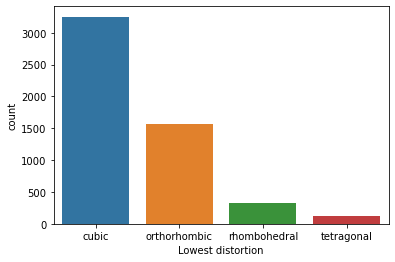

In [156]:
sns.countplot(df['Lowest distortion'])

Se necesita codificar nuestras variables categóricas a numéricas: A, B y Lowest distortion.

In [157]:
df["Lowest distortion"] = df["Lowest distortion"].astype('category')
df["Lowest distortion"] = df["Lowest distortion"].cat.codes

Codificando el Lowest distortion, se puede hacer una mapa de correlaciones, y ver como es su comportamiento con las otras variables

<ipython-input-160-9ccc3009f0ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

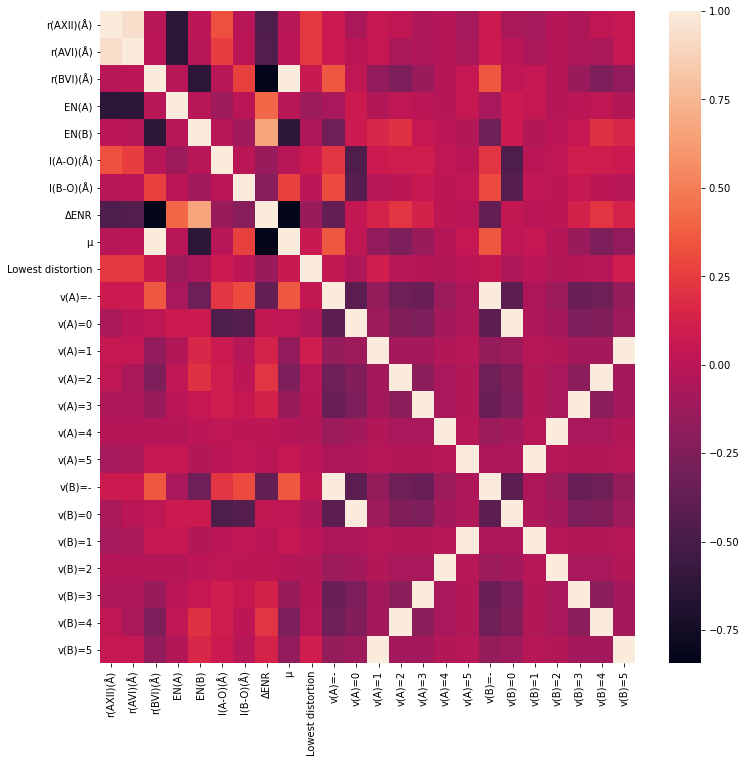

In [160]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

# No sabemos si nos conviene codificar las componentes A y las B. Por tanto, haré una copia del dataset que tenemos, y codificaremos la A y la B allí #

In [169]:
data=df.copy()

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 0 to 5328
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A                  5276 non-null   object 
 1   B                  5276 non-null   object 
 2   r(AXII)(Å)         5276 non-null   float64
 3   r(AVI)(Å)          5276 non-null   float64
 4   r(BVI)(Å)          5276 non-null   float64
 5   EN(A)              5276 non-null   float64
 6   EN(B)              5276 non-null   float64
 7   l(A-O)(Å)          5276 non-null   float64
 8   l(B-O)(Å)          5276 non-null   float64
 9   ΔENR               5276 non-null   float64
 10  μ                  5276 non-null   float64
 11  Lowest distortion  5276 non-null   int8   
 12  v(A)=-             5276 non-null   uint8  
 13  v(A)=0             5276 non-null   uint8  
 14  v(A)=1             5276 non-null   uint8  
 15  v(A)=2             5276 non-null   uint8  
 16  v(A)=3             5276 

# Comenzaremos a trabajar con la copia, para no irla a emparrar por si no nos conviene lo anterior\ dicho #

In [173]:
a = pd.get_dummies(data['A'], prefix="A=", prefix_sep="")
b = pd.get_dummies(data['B'], prefix="B=", prefix_sep="")
data = pd.concat([data, a, b], axis=1)

In [175]:
data.head()

,A,B,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,...,B=Ti,B=Tl,B=Tm,B=U,B=V,B=W,B=Y,B=Yb,B=Zn,B=Zr
0,Ac,Ac,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,...,0,0,0,0,0,0,0,0,0,0
1,Ac,Ag,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,...,0,0,0,0,0,0,0,0,0,0
2,Ac,Al,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,...,0,0,0,0,0,0,0,0,0,0
3,Ac,As,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,...,0,0,0,0,0,0,0,0,0,0
4,Ac,Au,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-176-acd226100141>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot:>

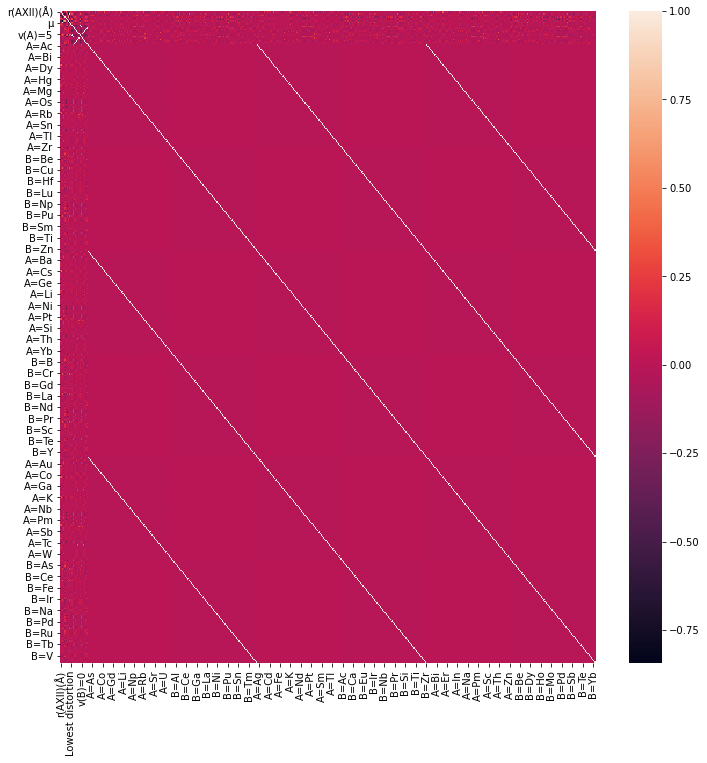

In [176]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())